## PROJECT ON: LOAN APPROVAL
    
###### Prepared by: Apurva.R.Suryawanshi

### Importing Various Libraries

Here we are importing various libraries
such as

o Numpy------> NumPy can be used to perform a wide variety of mathematical operations on arrays. 
               It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices.

o Pandas-----> Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning,                      exploring,and manipulating data.

o Seaborn----> Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random                    distributions.

o Matplotlib-> Matplotlib is a library in Python that enables users to generate visualizations like histograms, scatter                    plots, bar charts, pie charts and much more.

o Warnings---> A way to warn programmers about changes in language or library features in anticipation of backwards                        incompatible changes coming with Python 3.0.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Creating Dataframe

created the dataframe using pandas and here are the top 5 entries from various columns by the using head() function

In [2]:
df=pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Cleaning the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print("\t\t\t\tDROPING COLUMN Loan Id AS IT IS NOT REQURIED IN MY ANALYSIS")
df.drop(["Loan_ID"],axis=1,inplace=True)
df

				DROPING COLUMN Loan Id AS IT IS NOT REQURIED IN MY ANALYSIS


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Handling the missing values in the Dataset

Here we are finding the missing values in the Dataset

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we are finding the missing values percentage-wise,so that we can decide that do we have to drop the null values or fill them with the mean or any specific value

In [6]:
df.isnull().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

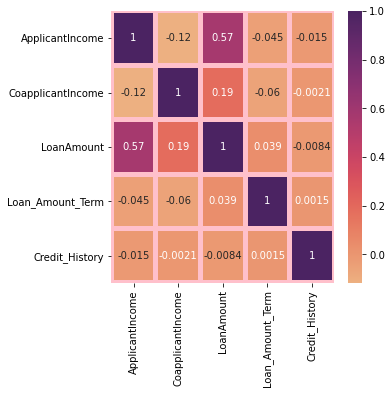

In [7]:
corr=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap='flare',linewidth=4,linecolor='pink',cbar=True)
plt.show()

Here we have plotted heatmap to see the relationship between various categories.

It is a Bivariate Graph

Here,the percentage of credit history & Loan Amount is greater than 3%, so we have replaced the missing values with the mean using the fillna()

In [8]:
rm=df['Credit_History'].mean()
df['Credit_History'].fillna(rm,inplace=True)

In [9]:
ab=df['LoanAmount'].mean()
df['LoanAmount'].fillna(ab,inplace=True)

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             542 non-null    object 
 1   Married            542 non-null    object 
 2   Dependents         542 non-null    object 
 3   Education          542 non-null    object 
 4   Self_Employed      542 non-null    object 
 5   ApplicantIncome    542 non-null    int64  
 6   CoapplicantIncome  542 non-null    float64
 7   LoanAmount         542 non-null    float64
 8   Loan_Amount_Term   542 non-null    float64
 9   Credit_History     542 non-null    float64
 10  Property_Area      542 non-null    object 
 11  Loan_Status        542 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 55.0+ KB


In [12]:
df['Dependents'].value_counts()

0     309
1      94
2      94
3+     45
Name: Dependents, dtype: int64

In [13]:
df['Dependents']=df['Dependents'].str.replace('+','')

converting the datatype

In [14]:
df['Dependents']=df['Dependents'].astype(int)

In [15]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


#### Now our cleaning of the Dataset is done, & our Dataset is ready for Analysis

### Analysis

#### 1.Display all the records having 3 Dependents.

In [17]:
df.loc[df['Dependents']==3]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,Male,Yes,3,Graduate,No,3036.0,2504.0,158.000000,360.0,0.000000,Semiurban,N
34,Male,No,3,Graduate,No,12500.0,3000.0,320.000000,360.0,1.000000,Rural,N
61,Male,Yes,3,Graduate,No,3029.0,0.0,99.000000,360.0,1.000000,Urban,Y
68,Male,Yes,3,Not Graduate,Yes,7100.0,0.0,125.000000,60.0,1.000000,Urban,Y
74,Male,Yes,3,Graduate,Yes,5266.0,1774.0,187.000000,360.0,1.000000,Semiurban,Y
78,Male,Yes,3,Graduate,No,3167.0,4000.0,180.000000,300.0,0.000000,Semiurban,N
79,Male,Yes,3,Not Graduate,Yes,3333.0,2166.0,130.000000,360.0,0.842199,Semiurban,Y
109,Male,Yes,3,Not Graduate,No,2071.0,754.0,94.000000,480.0,1.000000,Semiurban,Y
135,Male,Yes,3,Graduate,No,4000.0,7750.0,290.000000,360.0,1.000000,Semiurban,N
155,Male,Yes,3,Graduate,No,39999.0,0.0,600.000000,180.0,0.000000,Semiurban,Y


<Figure size 504x504 with 0 Axes>

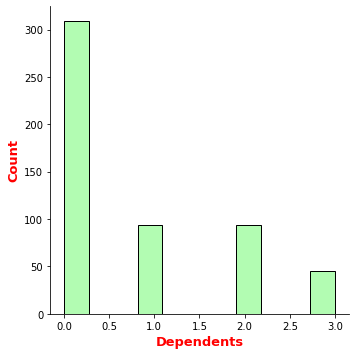

In [18]:
plt.figure(figsize=(7,7))
sns.displot(df['Dependents'],color='palegreen')
plt.xlabel('Dependents',color='red',fontweight='bold',fontsize='13')
plt.ylabel('Count',color='Red',fontweight='bold',fontsize='13')
plt.show()

Distplot is used to plot distribution of data

It is univariate graph

so in this graph we have 300 ppl with 0 dependents, 100 ppl with 1 dependents, and 3 dependents are 55 ppl who are there so they could repay the loan

#### 2.Display all the records of Applicant having highest Income.

In [19]:
a=(df['ApplicantIncome'].max())
print("Among all the Applicant,highest Income is RS/-",a)

Among all the Applicant,highest Income is RS/- 81000.0


In [20]:
df.loc[df['ApplicantIncome']==81000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3,Graduate,No,81000.0,0.0,360.0,360.0,0.0,Rural,N


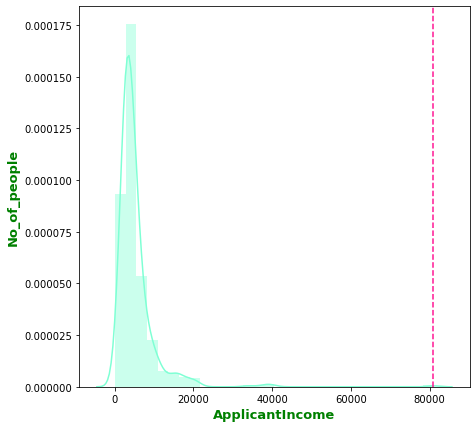

In [21]:
lmax=df['ApplicantIncome'].max()
plt.figure(figsize=(7,7))
sns.distplot(df['ApplicantIncome'],color='aquamarine',bins=30)
plt.axvline(lmax,color='deeppink',linestyle='--')
plt.xlabel('ApplicantIncome',color='green',fontweight='bold',fontsize='13')
plt.ylabel('No_of_people',color='green',fontweight='bold',fontsize='13')
plt.show()

In this plot we have various no of income from people the maximum no of people have few minimum income and the 10 percent of are there who have the maximum income i.e. Rs/-81000

#### 3.Display all records whose credit history  is between 1 and 2

In [22]:
df.loc[(df['Credit_History']>=1.0) & (df['Credit_History']<=2.0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y


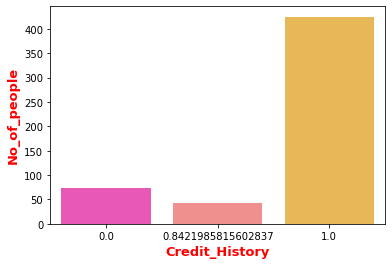

In [23]:
sns.countplot(x ='Credit_History', data = df,palette=("spring"))
plt.xlabel('Credit_History',color='Red',fontweight='bold',fontsize='13')
plt.ylabel('No_of_people',color='Red',fontweight='bold',fontsize='13')
plt.show()

In this graph we have plotted the credit history for people where we get the chances of people having the loan approved depends on the credit history 

Countplot is used for Comparison between different groups

It is a univariate 

#### 4.Display the income of applicant applied for loan who are not Self Employed

In [25]:
df['ApplicantIncome'].loc[df['Self_Employed']=='No']

0      5849.0
1      4583.0
3      2583.0
4      6000.0
6      2333.0
        ...  
608    3232.0
609    2900.0
610    4106.0
611    8072.0
612    7583.0
Name: ApplicantIncome, Length: 467, dtype: float64

Text(0.5, 1.0, 'Self Employed by Aplicant Income')

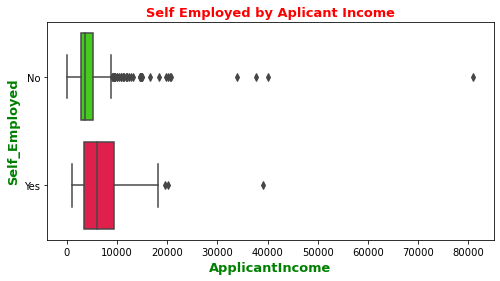

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x='ApplicantIncome',y='Self_Employed',data=df, palette='prism')
plt.xlabel('ApplicantIncome',color='green',fontweight='bold',fontsize='13')
plt.ylabel('Self_Employed',color='green',fontweight='bold',fontsize='13')
plt.title("Self Employed by Aplicant Income",fontweight='bold',fontsize='13',color='red')

Text(0, 0.5, 'Aplicant Income')

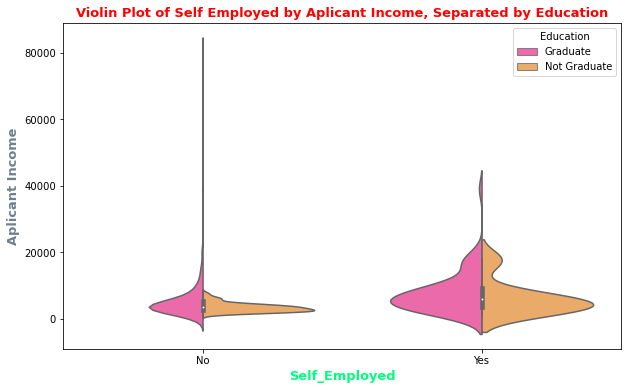

In [27]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Self_Employed',y="ApplicantIncome",data=df, hue='Education',split='True',  palette='spring')
plt.title("Violin Plot of Self Employed by Aplicant Income, Separated by Education",fontweight='bold',fontsize='13',color='Red')
plt.xlabel('Self_Employed',color='springgreen',fontweight='bold',fontsize='13')
plt.ylabel('Aplicant Income',color='slategrey',fontweight='bold',fontsize='13')

#### 5. Find the Total Amount of Loan Applied by Female Applicant.

In [28]:
df['LoanAmount'].loc[df['Gender']=='Female'].sum()

12376.824324324323

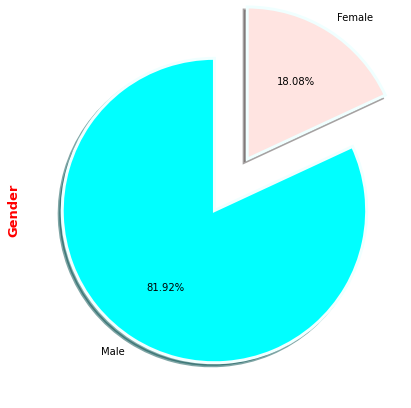

In [29]:
plt.figure(figsize=(7,7))
df['Gender'].value_counts().plot.pie(autopct="%1.2f%%",explode=(0,0.4),colors=('cyan','mistyrose'),
shadow=True,startangle = 90, wedgeprops={'linewidth' :3,'edgecolor':"azure" })
plt.ylabel('Gender',color='Red',fontweight='bold',fontsize='13')
plt.show()

#### 6.Display the loan status of those who are not graduate.

In [30]:
df.loc[df['Education']=='Not Graduate', ['Loan_Status','Education']]

,Loan_Status,Education
3,Y,Not Graduate
6,Y,Not Graduate
16,Y,Not Graduate
18,N,Not Graduate
20,N,Not Graduate
...,...,...
587,Y,Not Graduate
595,Y,Not Graduate
596,N,Not Graduate
605,N,Not Graduate


Text(0, 0.5, 'Education')

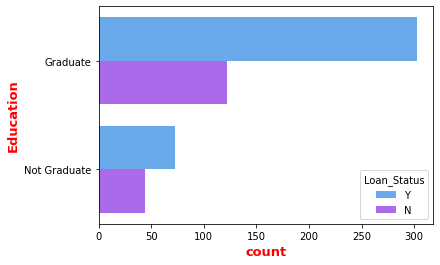

In [31]:
sns.countplot(data=df, y="Education", hue="Loan_Status",palette='cool')
plt.xlabel('count',color='Red',fontweight='bold',fontsize='13')
plt.ylabel('Education',color='Red',fontweight='bold',fontsize='13')

#### 7. Display the Property area where the Aplicant Income is 3000 or less than 3000

In [32]:
df.loc[df['ApplicantIncome']<=3000, ['Property_Area','ApplicantIncome']]

,Property_Area,ApplicantIncome
2,Urban,3000.0
3,Urban,2583.0
6,Urban,2333.0
13,Rural,1853.0
14,Urban,1299.0
...,...,...
587,Semiurban,2165.0
589,Semiurban,2726.0
590,Semiurban,3000.0
605,Urban,2400.0


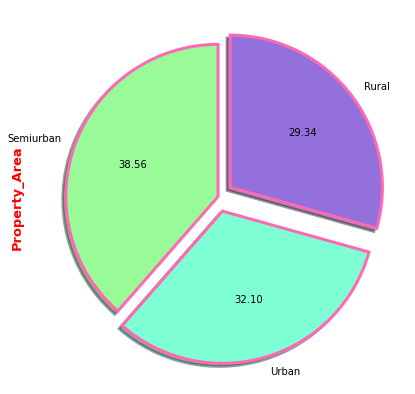

In [33]:
plt.figure(figsize=(7,7))
df['Property_Area'].value_counts().plot.pie(autopct=lambda ApplicantIncome: format(ApplicantIncome, '.2f') if ApplicantIncome <=3000 else None
,explode=(0,0.1,0.1),colors=('palegreen','aquamarine','mediumpurple'),
shadow=True,startangle = 90, wedgeprops={'linewidth' :3,'edgecolor':"hotpink" })
plt.ylabel('Property_Area',color='Red',fontweight='bold',fontsize='13')
plt.show()

#### 8.Display the Genders who are not self employed

In [34]:
df.loc[df['Self_Employed']=='No',['Self_Employed','Gender']]

,Self_Employed,Gender
0,No,Male
1,No,Male
3,No,Male
4,No,Male
6,No,Male
...,...,...
608,No,Male
609,No,Female
610,No,Male
611,No,Male


Text(0, 0.5, 'Self Employed')

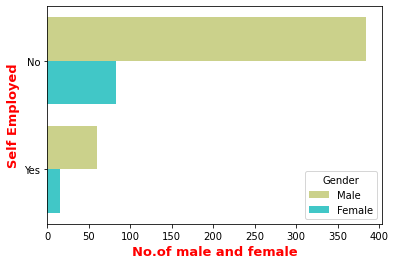

In [35]:
sns.countplot(data=df, y="Self_Employed", hue="Gender",palette="rainbow_r")
plt.xlabel('No.of male and female',color='Red',fontweight='bold',fontsize='13')
plt.ylabel('Self Employed',color='Red',fontweight='bold',fontsize='13')

#### 8. Display the income of Co-applicant who stay in rural areas by Education

In [36]:
df['CoapplicantIncome'].loc[df['Property_Area']=='Rural']

1      1508.0
13     2840.0
18        0.0
32        0.0
34     3000.0
        ...  
603    4301.0
607    1411.0
608    1950.0
609       0.0
610       0.0
Name: CoapplicantIncome, Length: 159, dtype: float64

Text(0, 0.5, 'Property area')

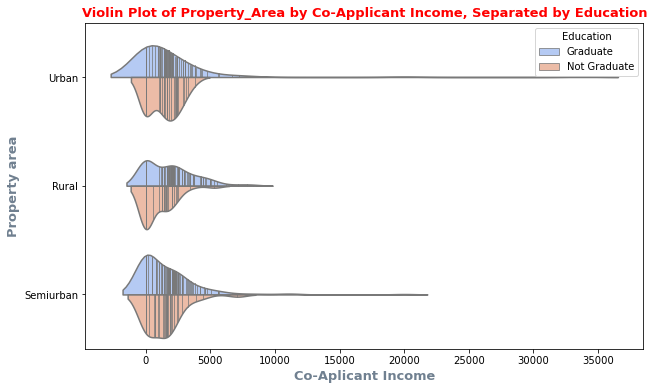

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(x='CoapplicantIncome',y="Property_Area",data=df, hue='Education',split='True', palette='coolwarm',inner='stick')
plt.title("Violin Plot of Property_Area by Co-Applicant Income, Separated by Education",fontweight='bold',fontsize='13',color='Red')
plt.xlabel('Co-Aplicant Income',color='slategrey',fontweight='bold',fontsize='13')
plt.ylabel('Property area',color='slategrey',fontweight='bold',fontsize='13')

 stick Represent every observation inside the distribution

#### 9.Display the records of those who are married and the loan status is rejected

In [38]:
df.loc[(df['Married']=='Yes')&(df['Loan_Status']=='N')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
7,Male,Yes,3,Graduate,No,3036.0,2504.0,158.000000,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,12841.0,10968.0,349.000000,360.0,1.0,Semiurban,N
18,Male,Yes,0,Not Graduate,No,4887.0,0.0,133.000000,360.0,1.0,Rural,N
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.000000,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Male,Yes,1,Graduate,No,4283.0,3000.0,172.000000,84.0,1.0,Rural,N
589,Male,Yes,2,Graduate,Yes,2726.0,0.0,106.000000,360.0,0.0,Semiurban,N
591,Male,Yes,2,Graduate,Yes,6000.0,0.0,205.000000,240.0,1.0,Semiurban,N
596,Male,Yes,2,Not Graduate,Yes,6383.0,1000.0,187.000000,360.0,1.0,Rural,N


Text(0, 0.5, 'No.of People')

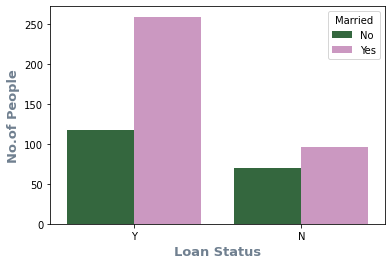

In [39]:
sns.countplot(data=df, x="Loan_Status", hue="Married",palette='cubehelix')
plt.xlabel('Loan Status',color='slategrey',fontweight='bold',fontsize='13')
plt.ylabel('No.of People',color='slategrey',fontweight='bold',fontsize='13')

#### 10.Display all the records of Co-Applicant having highest Income.

In [40]:
b=(df['CoapplicantIncome'].max())
print("Among all the Applicant,highest Income is RS/-",b)
df.loc[df['CoapplicantIncome']==33837]

Among all the Applicant,highest Income is RS/- 33837.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,Male,No,0,Graduate,No,1836.0,33837.0,90.0,360.0,1.0,Urban,N


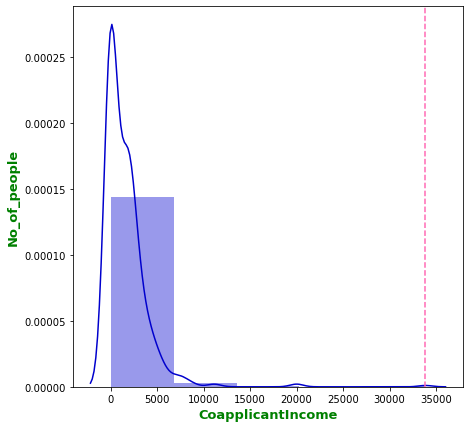

In [41]:
lmax=df['CoapplicantIncome'].max()
plt.figure(figsize=(7,7))
sns.distplot(df['CoapplicantIncome'],color='mediumblue',bins=5)
plt.axvline(lmax,color='hotpink',linestyle='--')
plt.xlabel('CoapplicantIncome',color='green',fontweight='bold',fontsize='13')
plt.ylabel('No_of_people',color='green',fontweight='bold',fontsize='13')
plt.show()